<a href="https://www.kaggle.com/danielebaldoni/italian-vaccination?scriptVersionId=89039880" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/italian-regions/ita_reg_ann_data.csv
/kaggle/input/italian-regions/ita_reg_mens_clima.csv
/kaggle/input/d/arthurio/italian-vaccination/italian_vaccination.csv


<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Flag_of_Italy.svg"
     style="width: 60%; margin: auto; padding-bottom: 20px;">

<h1 style='background:#26A2AB; border:0; color:black'><center>Introduction</center></h1> 

The data contains the following information:  
* **administration_date** - date for the data entry; for some of the dates we have only the daily vaccinations for a specific region and a specific range of age for which the vaccination information is provided;  

* **supplier** - The name of the supplier for the Vaccine
* **region** - Acronyms of Italian regions
* **age_range** - Age groups
* **males** - Number of vaccinated males
* **females** - Number of vaccinated females
* **first_dose** - Number of administered first doses
* **second_dose** - Number of administered second doses
* **previous infection** - Number of administrated doses to subjects previously infected with COVID-19
* **additional_booster_dose** - Number of administrated additional doses or boosters
* **NUTS1_code** - Stands for Nomenclature of Territorial Units for Statistics, is the codes for  5 Italian areas
* **NUTS2_code** - Same like Nuts_1 but it can differ for 21 regions instead of Geografic Areas 
* **ISTAT_regional_code** - short numeric code to every administrative division
* **region_name** - The entire name of the region  

To see the Nuts code you can read here:
https://en.wikipedia.org/wiki/NUTS_statistical_regions_of_Italy

#<a id="0"></a>

<a class="anchor" id="0.1"></a>
### Content  

* <a href='#1'>Analysis preparation</a>
* <a href='#2'>How many are vaccinated for Gender?</a>
* <a href='#3'>How many are vaccinated for Class of Age?</a>
* <a href='#4'>How many are vaccinated for Supplier?</a>
* <a href='#5'>How many are vaccinated for Region?</a>
* <a href='#6'>What vaccines are used in each region?</a> 
* <a href='#7'>How many are vaccinated (total and as percent from population)?</a>    
* <a href='#8'>General trends</a>  


### Last updated


Analysis Prepartion <a class="anchor" id="1" ></a>
===
                                                                                            

In [2]:
data=pd.read_csv("/kaggle/input/d/arthurio/italian-vaccination/italian_vaccination.csv")
data.head()

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo


In [3]:
data

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192637,2022-02-28,Pfizer/BioNTech,VEN,50-59,210,203,13,74,10,316,ITH,ITH3,5,Veneto
192638,2022-02-28,Pfizer/BioNTech,VEN,60-69,108,113,5,53,2,161,ITH,ITH3,5,Veneto
192639,2022-02-28,Pfizer/BioNTech,VEN,70-79,55,60,4,29,1,81,ITH,ITH3,5,Veneto
192640,2022-02-28,Pfizer/BioNTech,VEN,80-89,10,31,1,17,0,23,ITH,ITH3,5,Veneto


In [4]:
data.shape

(192642, 14)

As we see in the cell below the number of rows for the dataset is very high(more than 150k) and 14 columns. 
That's because for every day the data are divided for class of age and region. Just to make an example we have the first 146 rows related to the single day of 2020-12-27.

We should make some grouping operation if we want to understand more the different aspect 

In [5]:
data.nunique()

administration_date         429
supplier                      5
region                       21
age_range                    10
males                      5167
females                    5299
first_dose                 5050
second_dose                4956
previous infection          503
additional_booster_dose    5170
NUTS1_code                    5
NUTS2_code                   21
ISTAT_regional_code          20
region_name                  21
dtype: int64

We have 5 different suppliers, 21 different regions (20 + the autonomous province of Trento and Bolzano) and 10 different range of Age so we have a lot of different combinations of data (at the same time  we have to remember that we don't have data for every  single day for the different combination of this features that's why a line plot could not represent uniformly the trend of the vaccines). 

That's why some vaccines are retired and other vaccines are introduced in a second moment.

Just to make an example we have 3 different number of rows related to the 3 different dates in the cell below

In [6]:
#the first date in december 2021 has 147 rows, the second in march 2021 is of 461 and the last in january 2022 is 407
data.administration_date.unique()
data[data.administration_date=='2020-12-27'].count()[1],data[data.administration_date=='2021-03-15'].count()[1],data[data.administration_date=='2022-01-05'].count()[1]

(147, 462, 407)

In [7]:
data.region.value_counts()

LAZ    11529
LOM    10719
EMR    10373
CAM    10221
VEN    10008
PIE    10003
SIC     9986
CAL     9826
MAR     9790
PUG     9595
ABR     9565
TOS     9441
FVG     8884
SAR     8819
LIG     8723
BAS     8472
UMB     7963
PAB     7661
PAT     7596
MOL     6892
VDA     6576
Name: region, dtype: int64

at the same time we have to consider the frequence of data for every region is not the same. Lazio was one of the faster region in this campaign and one of the most populated, that's why we have the highest frequency of data for this region

In [8]:
data.supplier.value_counts()

Pfizer/BioNTech            77899
Moderna                    66154
Vaxzevria (AstraZeneca)    27871
Janssen                    19260
Pfizer for children         1458
Name: supplier, dtype: int64

The sum of Males and Females should be equal to: 
first doses + second doses + previous infection + additional dose + booster dose

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192642 entries, 0 to 192641
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   administration_date      192642 non-null  object
 1   supplier                 192642 non-null  object
 2   region                   192642 non-null  object
 3   age_range                192642 non-null  object
 4   males                    192642 non-null  int64 
 5   females                  192642 non-null  int64 
 6   first_dose               192642 non-null  int64 
 7   second_dose              192642 non-null  int64 
 8   previous infection       192642 non-null  int64 
 9   additional_booster_dose  192642 non-null  int64 
 10  NUTS1_code               192642 non-null  object
 11  NUTS2_code               192642 non-null  object
 12  ISTAT_regional_code      192642 non-null  int64 
 13  region_name              192642 non-null  object
dtypes: int64(7), object(

We have both categorical and numerical features and we can make different kind of plots depending on the combinations of thi type of features.

The Age is grouped in class it's still categorical but we could make a transformation to treat it as numeric.

We can make some kind of grouping on the various modality of the categorical features.

How many are vaccinated for Gender? <a class="anchor" id="2"></a>
===


First of all we import the 2 libraries most used for graphical options. 
*Matplotlib* and *Seaborn*

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

The total of vaccination for gender is  of 64596637 vaccination for women and 60895478 for men as we can see below

In [11]:
data.females.sum(),data.males.sum()

(68837620, 65259743)

Let's organize this data in a tabular way

In [12]:
print("Number of Vaccination for Gender")
tot=np.array([data.males.sum(),data.females.sum()])
tot=pd.DataFrame(tot,index=["Males","Females"])
tot.columns=["Total"]
tot.gender=["Males","Females"]
tot

Number of Vaccination for Gender


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,Total
Males,65259743
Females,68837620


The difference is minimum.

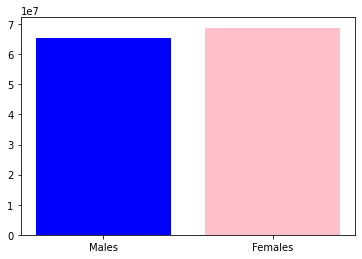

In [13]:

#plt.bar(tot.index,list(tot["Total"].value_counts()),color=["b","pink"])
plt.bar(tot.index,list(tot["Total"]),color= ["b","pink"])
#plt.bar(list(tot["Total"].value_counts()[0:1].keys()),list(tot["Total"].value_counts()[0:1]))
#plt.bar(list(fifa['nationality'].value_counts()[0:5].keys()),list(fifa['nationality'].value_counts()[0:5]),color="g")
plt.show()       



Of course we have to weight this data with the real  values for the distribution of the population in Italy.
We found in this site this values of 28864088 for Male population and 30393478 for Female population who is registered at the moment in Italy. 

You can find this data at this site:
28864088
https://www.statista.com/statistics/786485/population-by-gender-in-italy/

In [14]:
tot["Registered"]=[28864088,30393478]
tot["Prop"]=tot.Total/tot.Registered
tot

,Total,Registered,Prop
Males,65259743,28864088,2.260932
Females,68837620,30393478,2.264881


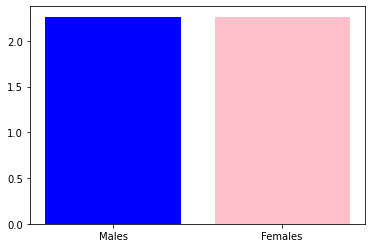

In [15]:
plt.bar(tot.index,list(tot["Prop"]),color=["b","pink"])
#plt.bar(list(tot["Total"].value_counts()[0:1].keys()),list(tot["Total"].value_counts()[0:1]))
#plt.bar(list(fifa['nationality'].value_counts()[0:5].keys()),list(fifa['nationality'].value_counts()[0:5]),color="g")
plt.show()

In the 2 tables below we observe the number of the complexive vaccination for gender in the different regions

In [16]:
print("Number of Vaccination for Region on male population")
data.groupby("region_name")["males"].sum().sort_values(ascending =False)

Number of Vaccination for Region on male population


region_name
Lombardia                             11459054
Lazio                                  6358712
Campania                               6012524
Veneto                                 5326110
Emilia-Romagna                         4950313
Sicilia                                4920237
Piemonte                               4725431
Puglia                                 4450089
Toscana                                4151597
Calabria                               1961541
Sardegna                               1796652
Liguria                                1644278
Marche                                 1605060
Abruzzo                                1415187
Friuli-Venezia Giulia                  1303847
Umbria                                  957984
Basilicata                              607355
Provincia Autonoma Trento               598488
Provincia Autonoma Bolzano / Bozen      544033
Molise                                  337737
Valle d'Aosta / Vallée d'Aoste          133514
N

In [17]:
print("Number of Vaccination for Region on female population")
data.groupby("region_name")["females"].sum().sort_values(ascending = False)

Number of Vaccination for Region on female population


region_name
Lombardia                             11936613
Lazio                                  6876633
Campania                               6319541
Veneto                                 5499934
Sicilia                                5226131
Emilia-Romagna                         5189893
Piemonte                               4983943
Puglia                                 4781266
Toscana                                4422274
Calabria                               2061537
Sardegna                               1896173
Liguria                                1765843
Marche                                 1695654
Abruzzo                                1494139
Friuli-Venezia Giulia                  1361559
Umbria                                 1041533
Basilicata                              636789
Provincia Autonoma Trento               611897
Provincia Autonoma Bolzano / Bozen      541590
Molise                                  357001
Valle d'Aosta / Vallée d'Aoste          137677
N

This table represent the number of different kind of vaccination for day. As we can see in the beginning we had just 2 kind of vaccinations ( first doses and doses for previous infection).
While many people has already vaccinated in this phase the most of vaccines are additional booster for people who already get 2 doses but the number of first and second doses tells us the number of people withouth any vaccination is decreasing by few tens of thousands for day

Data Grouped by day
----

In [18]:
data.groupby("administration_date")["first_dose","second_dose","previous infection","additional_booster_dose"].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,first_dose,second_dose,previous infection,additional_booster_dose
administration_date,,,,
2020-12-27,7331,0,17,0
2020-12-28,1503,0,2,0
2020-12-29,1097,0,1,0
2020-12-30,4881,0,3,0
2020-12-31,25907,0,37,0
...,...,...,...,...
2022-02-24,5991,31526,554,77618
2022-02-25,5487,33516,569,89604
2022-02-26,5392,37852,706,88189


In [19]:
data

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192637,2022-02-28,Pfizer/BioNTech,VEN,50-59,210,203,13,74,10,316,ITH,ITH3,5,Veneto
192638,2022-02-28,Pfizer/BioNTech,VEN,60-69,108,113,5,53,2,161,ITH,ITH3,5,Veneto
192639,2022-02-28,Pfizer/BioNTech,VEN,70-79,55,60,4,29,1,81,ITH,ITH3,5,Veneto
192640,2022-02-28,Pfizer/BioNTech,VEN,80-89,10,31,1,17,0,23,ITH,ITH3,5,Veneto


In [20]:
data["dailytotal"]=data.males+data.females
data

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,dailytotal
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia,1
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo,2
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo,5
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo,9
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192637,2022-02-28,Pfizer/BioNTech,VEN,50-59,210,203,13,74,10,316,ITH,ITH3,5,Veneto,413
192638,2022-02-28,Pfizer/BioNTech,VEN,60-69,108,113,5,53,2,161,ITH,ITH3,5,Veneto,221
192639,2022-02-28,Pfizer/BioNTech,VEN,70-79,55,60,4,29,1,81,ITH,ITH3,5,Veneto,115
192640,2022-02-28,Pfizer/BioNTech,VEN,80-89,10,31,1,17,0,23,ITH,ITH3,5,Veneto,41


In [21]:
data.dailytotal

0           1
1           2
2           5
3           9
4          13
         ... 
192637    413
192638    221
192639    115
192640     41
192641     11
Name: dailytotal, Length: 192642, dtype: int64

How many are vaccinated for Class of Age <a class='anchor' id= 3></a>
===


In [22]:
print("Number of Vaccination for Age in class for the male population")
data.groupby("age_range")["males"].sum().sort_values(ascending = False)

Number of Vaccination for Age in class for the male population


age_range
50-59    11752228
40-49    10051395
60-69     9474636
30-39     7897436
70-79     7607315
20-29     7458568
12-19     4818039
80-89     4273997
05-11     1243062
90+        683067
Name: males, dtype: int64

In [89]:
print("Number of Vaccination for Age in class for the female population")
data.groupby("age_range")["females"].sum().sort_values()

Number of Vaccination for Age in class for the female population


age_range
05-11     1180578
90+       1625844
12-19     4541759
80-89     6075660
20-29     6867827
30-39     7557761
70-79     8637312
60-69    10049814
40-49    10176330
50-59    12124735
Name: females, dtype: int64

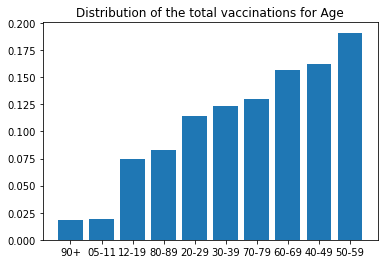

In [24]:
plt.title("Distribution of the total vaccinations for Age")
aget=pd.DataFrame(data.groupby("age_range")["dailytotal"].sum().sort_values()/124955498)
aget.columns=["Total"]
plt.bar(aget.index,list(aget["Total"]))
plt.show()

In [25]:
#The number 124955498 represent the total of vaccinations (Males + Females)
print((data.groupby("age_range")["dailytotal"].sum().sort_values()/124955498)*100)

age_range
90+       1.847787
05-11     1.939603
12-19     7.490505
80-89     8.282674
20-29    11.465198
30-39    12.368561
70-79    13.000330
60-69    15.625123
40-49    16.187943
50-59    19.108373
Name: dailytotal, dtype: float64


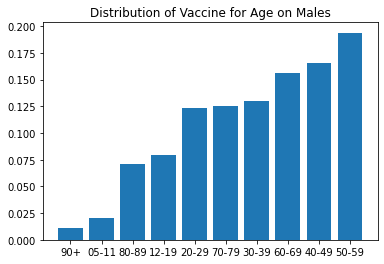

In [26]:
plt.title("Distribution of Vaccine for Age on Males")
agem=pd.DataFrame(data.groupby("age_range")["males"].sum().sort_values()/60627130)
#(data.groupby("age_range")["dailytotal"].sum().sort_values()/60627130)
agem.columns=["Total"]
plt.bar(agem.index,list(agem["Total"]))
plt.show()

In [27]:
print((data.groupby("age_range")["males"].sum().sort_values()/60627130)*100)


age_range
90+       1.126669
05-11     2.050340
80-89     7.049644
12-19     7.947002
20-29    12.302360
70-79    12.547708
30-39    13.026241
60-69    15.627717
40-49    16.579038
50-59    19.384437
Name: males, dtype: float64


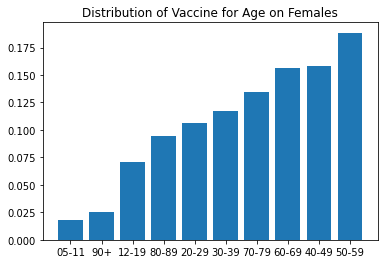

In [28]:
plt.title("Distribution of Vaccine for Age on Females")
agef= pd.DataFrame(data.groupby("age_range")["females"].sum().sort_values()/64328368)
agef.columns=["Total"]
plt.bar(agef.index,list(agef["Total"]))
plt.show()

We can found some differences in percentage but to make conclusions we should know the demographic structure of the population. 

For example we can see that the percentage of old people (90+) vaccinated in the female population is double than the male proportion but it could be due to the fact that women as in mean an higher life expectation.

In general we can't see a particular difference for the age structure of population in the diffrent class of age. 


In [29]:
(data.groupby("age_range")["females"].sum().sort_values()/64596637)*100

age_range
05-11     1.827615
90+       2.516917
12-19     7.030953
80-89     9.405536
20-29    10.631865
30-39    11.699930
70-79    13.371148
60-69    15.557798
40-49    15.753653
50-59    18.769917
Name: females, dtype: float64

In [30]:
data.females.sum()

68837620

How many are vaccinated for Supplier? <a class="anchor" id="4"></a>
===


In [31]:
male=pd.DataFrame(data.groupby("supplier")["males"].sum().sort_values(ascending = False)/data.males.sum())
female=pd.DataFrame(data.groupby("supplier")["females"].sum().sort_values(ascending = False)/data.females.sum())

In [32]:
male

,males
supplier,
Pfizer/BioNTech,0.625760
Moderna,0.253924
Vaxzevria (AstraZeneca),0.088039
Pfizer for children,0.019048
Janssen,0.013229


In [33]:
female

,females
supplier,
Pfizer/BioNTech,0.640234
Moderna,0.239929
Vaxzevria (AstraZeneca),0.093335
Pfizer for children,0.017150
Janssen,0.009352


We could note 2 facts:
- Women seems to prefer a little more pfizer than the men.
- Janssen seems to be more diffused in the men population

The differences aniway are not so much strong, 


In [34]:
data.groupby("supplier")["males"].sum(),data.groupby("supplier")["females"].sum()

(supplier
 Janssen                      863348
 Moderna                    16571016
 Pfizer for children         1243062
 Pfizer/BioNTech            40836927
 Vaxzevria (AstraZeneca)     5745390
 Name: males, dtype: int64,
 supplier
 Janssen                      643785
 Moderna                    16516118
 Pfizer for children         1180578
 Pfizer/BioNTech            44072183
 Vaxzevria (AstraZeneca)     6424956
 Name: females, dtype: int64)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


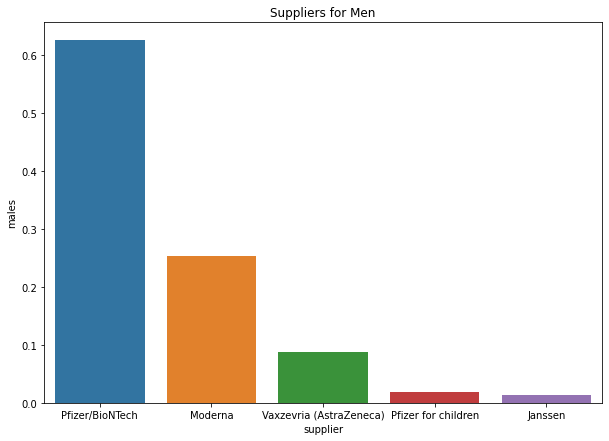

In [35]:
plt.figure(figsize=(10,7))
plt.title ("Suppliers for Men")
sns.barplot(male.index,male.males)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


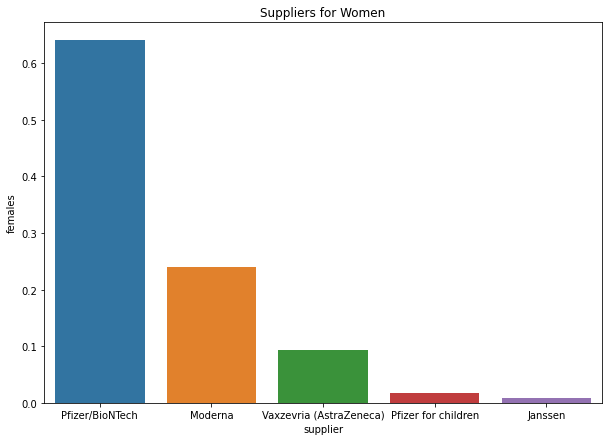

In [36]:
plt.figure(figsize=(10,7))
plt.title ("Suppliers for Women")
sns.barplot(female.index,female.females)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


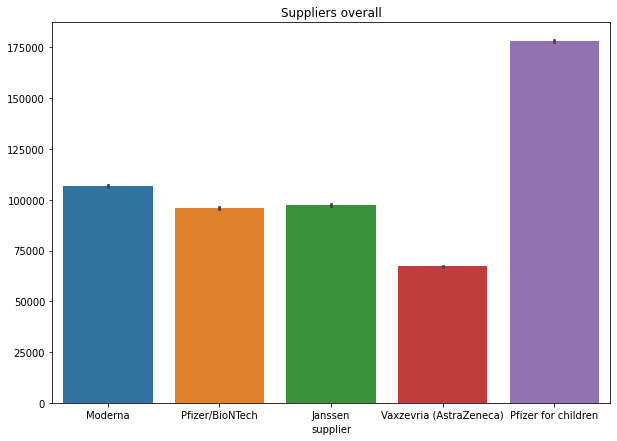

In [37]:
plt.figure(figsize=(10,7))
plt.title ("Suppliers overall")
sns.barplot(data.supplier,data.supplier.index
           )
plt.show()

In [38]:
massi=male
massi["gender"]="male"
massi.columns=["tot","gender"]
#massi["tot"]=massi["tot"]*60895478
massi


,tot,gender
supplier,,
Pfizer/BioNTech,0.625760,male
Moderna,0.253924,male
Vaxzevria (AstraZeneca),0.088039,male
Pfizer for children,0.019048,male
Janssen,0.013229,male


In [39]:
female["gender"]="female"
female.columns=["tot","gender"]
female


,tot,gender
supplier,,
Pfizer/BioNTech,0.640234,female
Moderna,0.239929,female
Vaxzevria (AstraZeneca),0.093335,female
Pfizer for children,0.017150,female
Janssen,0.009352,female


In [40]:
data.groupby("supplier")["males"].sum()

supplier
Janssen                      863348
Moderna                    16571016
Pfizer for children         1243062
Pfizer/BioNTech            40836927
Vaxzevria (AstraZeneca)     5745390
Name: males, dtype: int64

In [41]:

massi.tot=data.groupby("supplier")["males"].sum().sort_values(ascending = False)
female.tot=data.groupby("supplier")["females"].sum().sort_values(ascending = False)
genderdf=[massi,female]
genderdf=pd.concat(genderdf)
genderdf["supplier"]=genderdf.index
genderdf


,tot,gender,supplier
supplier,,,
Pfizer/BioNTech,40836927,male,Pfizer/BioNTech
Moderna,16571016,male,Moderna
Vaxzevria (AstraZeneca),5745390,male,Vaxzevria (AstraZeneca)
Pfizer for children,1243062,male,Pfizer for children
Janssen,863348,male,Janssen
Pfizer/BioNTech,44072183,female,Pfizer/BioNTech
Moderna,16516118,female,Moderna
Vaxzevria (AstraZeneca),6424956,female,Vaxzevria (AstraZeneca)
Pfizer for children,1180578,female,Pfizer for children


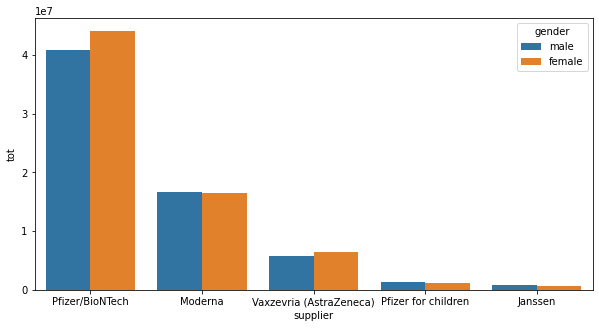

In [42]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x="supplier", y= "tot",hue="gender", data =genderdf)


How many are vaccinated for Region? <a class="anchor" id="5"></a>
===

In [43]:
regions=pd.read_csv("/kaggle/input/italian-regions/ita_reg_ann_data.csv")
regions

,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
0,1,Piemonte,129322,30300,4356406,25387.07,172,1181,8,2
1,2,Valle d'Aosta,4436,35200,125666,3260.90,39,74,1,0
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
3,4,Trentino Alto Adige,41104,39074,1072276,13605.50,79,282,2,0
4,5,Veneto,155515,33100,4905854,18345.35,267,563,7,1
5,6,Friuli Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
8,9,Toscana,112239,30500,3729641,22987.04,162,273,10,1
9,10,Umbria,21341,24300,882015,8464.33,104,92,2,0


In [44]:
#Let's change ordet to can compare the two datasets
regions=regions.sort_values(by="den_reg")
regions



,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
12,13,Abruzzo,31959,24400,1311580,10831.84,121,305,4,0
16,17,Basilicata,11782,20800,562869,10073.32,56,131,2,0
17,18,Calabria,33054,17100,1947131,15221.90,128,404,5,0
14,15,Campania,106753,18200,5801692,13670.95,424,550,5,1
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
5,6,Friuli Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
11,12,Lazio,185935,32900,5879082,17232.29,341,378,5,2
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
10,11,Marche,40988,26600,1525271,9401.38,162,228,5,0


In [45]:
regions1=regions
#regions1.append(regions[5:6])
regions1

,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
12,13,Abruzzo,31959,24400,1311580,10831.84,121,305,4,0
16,17,Basilicata,11782,20800,562869,10073.32,56,131,2,0
17,18,Calabria,33054,17100,1947131,15221.90,128,404,5,0
14,15,Campania,106753,18200,5801692,13670.95,424,550,5,1
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
5,6,Friuli Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
11,12,Lazio,185935,32900,5879082,17232.29,341,378,5,2
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
10,11,Marche,40988,26600,1525271,9401.38,162,228,5,0


In [46]:
regions1.den_reg[5]="Friuli-Venezia Giulia"
regions1=regions1.drop(index=(3))
regions1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
12,13,Abruzzo,31959,24400,1311580,10831.84,121,305,4,0
16,17,Basilicata,11782,20800,562869,10073.32,56,131,2,0
17,18,Calabria,33054,17100,1947131,15221.90,128,404,5,0
14,15,Campania,106753,18200,5801692,13670.95,424,550,5,1
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
5,6,Friuli-Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
11,12,Lazio,185935,32900,5879082,17232.29,341,378,5,2
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
10,11,Marche,40988,26600,1525271,9401.38,162,228,5,0


In [47]:
data['date'] = pd.to_datetime(data['administration_date'])
data

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,dailytotal,date
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia,1,2020-12-27
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo,2,2020-12-27
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo,5,2020-12-27
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo,9,2020-12-27
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo,13,2020-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192637,2022-02-28,Pfizer/BioNTech,VEN,50-59,210,203,13,74,10,316,ITH,ITH3,5,Veneto,413,2022-02-28
192638,2022-02-28,Pfizer/BioNTech,VEN,60-69,108,113,5,53,2,161,ITH,ITH3,5,Veneto,221,2022-02-28
192639,2022-02-28,Pfizer/BioNTech,VEN,70-79,55,60,4,29,1,81,ITH,ITH3,5,Veneto,115,2022-02-28
192640,2022-02-28,Pfizer/BioNTech,VEN,80-89,10,31,1,17,0,23,ITH,ITH3,5,Veneto,41,2022-02-28


In [48]:
df = data[['administration_date', 'supplier', 'region', 'age_range', 'males',
       'females', 'first_dose', 'second_dose', 'previous infection',
       'additional_booster_dose', 'region_name', 'date',"dailytotal"]].copy()
df.head()

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,region_name,date,dailytotal
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,Sicilia,2020-12-27,1
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,Abruzzo,2020-12-27,2
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,Abruzzo,2020-12-27,5
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,Abruzzo,2020-12-27,9
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,Abruzzo,2020-12-27,13


In [49]:
reg_name=pd.DataFrame(data.groupby("region_name")[["dailytotal","first_dose","second_dose","previous infection","additional_booster_dose","males","females"]].sum())
#reg_name["pop_resid"]=regions["pop_resid"]
#reg_name["propTV"]=reg_name["TotVaccine"]/reg_name["pop_resid"]
reg_name1=reg_name.drop(index=("Provincia Autonoma Bolzano / Bozen"))
reg_name1=reg_name1.drop(index=("Provincia Autonoma Trento"))
reg_name1

,dailytotal,first_dose,second_dose,previous infection,additional_booster_dose,males,females
region_name,,,,,,,
Abruzzo,2909326,1047563,1002091,35502,824170,1415187,1494139
Basilicata,1244144,454552,428194,13092,348306,607355,636789
Calabria,4023078,1512515,1412054,30464,1068045,1961541,2061537
Campania,12332065,4536015,4269209,184297,3342544,6012524,6319541
Emilia-Romagna,10140206,3651495,3472657,164668,2851386,4950313,5189893
Friuli-Venezia Giulia,2665406,963510,905879,49043,746974,1303847,1361559
Lazio,13235345,4837224,4430266,164223,3803632,6358712,6876633
Liguria,3410121,1255178,1199930,29121,925892,1644278,1765843
Lombardia,23395667,8404773,7911288,320029,6759577,11459054,11936613


In [50]:
a=pd.DataFrame(data.groupby("region_name")["previous infection"].sum())
a["first_dose"]=data.groupby("region_name")["first_dose"].sum()
a["second_dose"]=data.groupby("region_name")["second_dose"].sum()
a["booster_dose"]=data.groupby("region_name")["additional_booster_dose"].sum()
a

,previous infection,first_dose,second_dose,booster_dose
region_name,,,,
Abruzzo,35502,1047563,1002091,824170
Basilicata,13092,454552,428194,348306
Calabria,30464,1512515,1412054,1068045
Campania,184297,4536015,4269209,3342544
Emilia-Romagna,164668,3651495,3472657,2851386
Friuli-Venezia Giulia,49043,963510,905879,746974
Lazio,164223,4837224,4430266,3803632
Liguria,29121,1255178,1199930,925892
Lombardia,320029,8404773,7911288,6759577


In [51]:
a=regions1.pop_resid
a.index=reg_name1.index
reg_name1["pop_resid"]=a
reg_name1
reg_name1["propTV"]=reg_name1["dailytotal"]/reg_name1["pop_resid"]
reg_name1

,dailytotal,first_dose,second_dose,previous infection,additional_booster_dose,males,females,pop_resid,propTV
region_name,,,,,,,,,
Abruzzo,2909326,1047563,1002091,35502,824170,1415187,1494139,1311580,2.218184
Basilicata,1244144,454552,428194,13092,348306,607355,636789,562869,2.210362
Calabria,4023078,1512515,1412054,30464,1068045,1961541,2061537,1947131,2.066157
Campania,12332065,4536015,4269209,184297,3342544,6012524,6319541,5801692,2.125598
Emilia-Romagna,10140206,3651495,3472657,164668,2851386,4950313,5189893,4459477,2.273855
Friuli-Venezia Giulia,2665406,963510,905879,49043,746974,1303847,1361559,1215220,2.193353
Lazio,13235345,4837224,4430266,164223,3803632,6358712,6876633,5879082,2.251260
Liguria,3410121,1255178,1199930,29121,925892,1644278,1765843,1550640,2.199170
Lombardia,23395667,8404773,7911288,320029,6759577,11459054,11936613,10060574,2.325480


In [52]:
reg_name1.sort_values(by=("propTV"),ascending = False).head()

,dailytotal,first_dose,second_dose,previous infection,additional_booster_dose,males,females,pop_resid,propTV
region_name,,,,,,,,,
Lombardia,23395667,8404773,7911288,320029,6759577,11459054,11936613,10060574,2.325480
Toscana,8573871,3125934,2982453,112902,2352582,4151597,4422274,3729641,2.298846
Puglia,9231355,3328839,3140813,140572,2621131,4450089,4781266,4029053,2.291197
Emilia-Romagna,10140206,3651495,3472657,164668,2851386,4950313,5189893,4459477,2.273855
Molise,694738,251423,237248,8620,197447,337737,357001,305617,2.273231


In [53]:
reg_name[12:14]

,dailytotal,first_dose,second_dose,previous infection,additional_booster_dose,males,females
region_name,,,,,,,
Provincia Autonoma Bolzano / Bozen,1085623,402951,374728,19367,288577,544033,541590
Provincia Autonoma Trento,1210385,436353,414495,29112,330425,598488,611897


In [54]:
#For Trentino Alto Adige region we have a value who one of the lowest of our distribution.
#with 2.02 is higher just than Sicilia,Calabria,Sardegna and Campania who are all south regions.
vaccination_TAA= 1044534+1160282
propTV_TAA=vaccination_TAA/1072276
propTV_TAA

2.0562019480059237

we can analize the 2 comunities singularly. We can find online the population for 

Bolzano province = 536838

Trento Province= 542235

who is more or less the same of our dataset (1079073)

https://it.wikipedia.org/wiki/Trentino-Alto_Adige


In [55]:
propBA=1044534/536838
print(propBA)
propTR=1160282/542235
print(propTR)

1.945715467235926
2.1398139183195477


The proportion is really different between the 2 province, we have 1,95 who is the second lowest value ( higher just than Sicilia) for the autonomous province of Bolzano  and 2,13 for the autonomous province of Trento who is near the best values of the other regions. It is curious if we consider that this regions are really near geographically. 

In [56]:
data.first_dose.sum(),data.second_dose.sum(),data.additional_booster_dose.sum(),data["previous infection"].sum()

(48745796, 45968854, 37499159, 1883554)

This is interesting because we can note that some region has an higher percentage of people with previous infection than people vaccinated with the classic cicle of vacccination and viceversa. 

In [57]:
percentages=pd.DataFrame(data.groupby("region_name")["previous infection"].sum()/data["previous infection"].sum())*100
percentages["first_dose"]=(data.groupby("region_name")["first_dose"].sum()/data.first_dose.sum())*100
percentages["second_dose"]=(data.groupby("region_name")["second_dose"].sum()/data.second_dose.sum())*100
percentages["booster_dose"]=(data.groupby("region_name")["additional_booster_dose"].sum()/data.additional_booster_dose.sum())*100
percentages

,previous infection,first_dose,second_dose,booster_dose
region_name,,,,
Abruzzo,1.884841,2.149033,2.179935,2.197836
Basilicata,0.695069,0.932495,0.931487,0.928837
Calabria,1.617368,3.102862,3.071762,2.848184
Campania,9.784535,9.305449,9.287177,8.913651
Emilia-Romagna,8.742409,7.490892,7.554369,7.603867
Friuli-Venezia Giulia,2.603748,1.976601,1.970636,1.991975
Lazio,8.718784,9.923367,9.637538,10.143246
Liguria,1.546067,2.574946,2.610311,2.469101
Lombardia,16.990699,17.242047,17.210105,18.025943


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='region', ylabel='previous infection'>

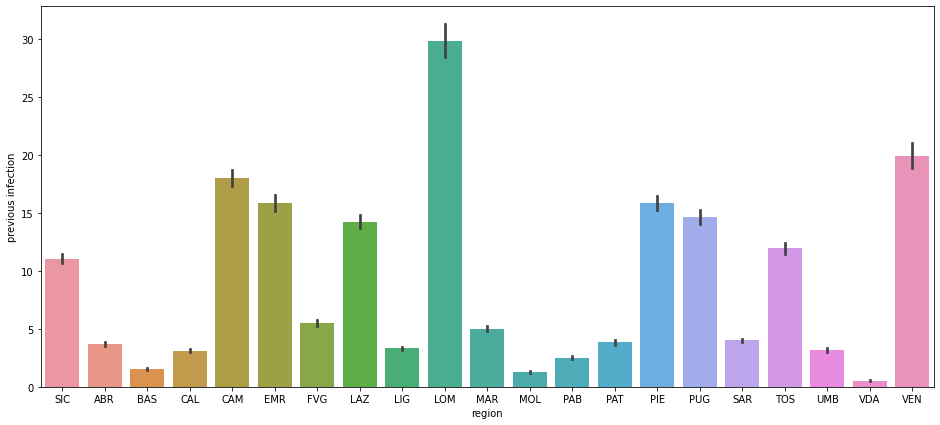

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
sns.barplot(data["region"],data["previous infection"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='region', ylabel='first_dose'>

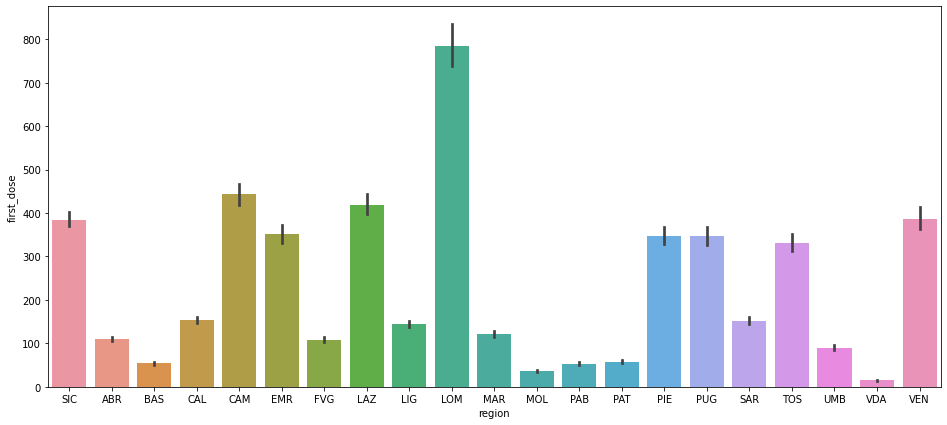

In [59]:
plt.figure(figsize=(16,7))
sns.barplot(data["region"],data["first_dose"])

In [60]:
reg_name1["1stProp"]=reg_name1["first_dose"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("1stProp"),ascending = False).head()

,dailytotal,first_dose,second_dose,previous infection,additional_booster_dose,males,females,pop_resid,propTV,1stProp
region_name,,,,,,,,,,
Toscana,8573871,3125934,2982453,112902,2352582,4151597,4422274,3729641,2.298846,0.838133
Lombardia,23395667,8404773,7911288,320029,6759577,11459054,11936613,10060574,2.325480,0.835417
Puglia,9231355,3328839,3140813,140572,2621131,4450089,4781266,4029053,2.291197,0.826209
Lazio,13235345,4837224,4430266,164223,3803632,6358712,6876633,5879082,2.251260,0.822786
Molise,694738,251423,237248,8620,197447,337737,357001,305617,2.273231,0.822673


In [61]:
reg_name1["2ndProp"]=reg_name1["second_dose"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("2ndProp"),ascending = False).head()

,dailytotal,first_dose,second_dose,previous infection,additional_booster_dose,males,females,pop_resid,propTV,1stProp,2ndProp
region_name,,,,,,,,,,,
Toscana,8573871,3125934,2982453,112902,2352582,4151597,4422274,3729641,2.298846,0.838133,0.799662
Lombardia,23395667,8404773,7911288,320029,6759577,11459054,11936613,10060574,2.325480,0.835417,0.786365
Sardegna,3692825,1343974,1288716,35474,1024661,1796652,1896173,1639591,2.252284,0.819701,0.785998
Puglia,9231355,3328839,3140813,140572,2621131,4450089,4781266,4029053,2.291197,0.826209,0.779541
Emilia-Romagna,10140206,3651495,3472657,164668,2851386,4950313,5189893,4459477,2.273855,0.818817,0.778714


In [62]:
reg_name1["boostProp"]=reg_name1["additional_booster_dose"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("boostProp"),ascending = False).head()

,dailytotal,first_dose,second_dose,previous infection,additional_booster_dose,males,females,pop_resid,propTV,1stProp,2ndProp,boostProp
region_name,,,,,,,,,,,,
Lombardia,23395667,8404773,7911288,320029,6759577,11459054,11936613,10060574,2.325480,0.835417,0.786365,0.671888
Puglia,9231355,3328839,3140813,140572,2621131,4450089,4781266,4029053,2.291197,0.826209,0.779541,0.650558
Umbria,1999517,719306,682266,25273,572672,957984,1041533,882015,2.266988,0.815526,0.773531,0.649277
Lazio,13235345,4837224,4430266,164223,3803632,6358712,6876633,5879082,2.251260,0.822786,0.753564,0.646977
Molise,694738,251423,237248,8620,197447,337737,357001,305617,2.273231,0.822673,0.776292,0.646060


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


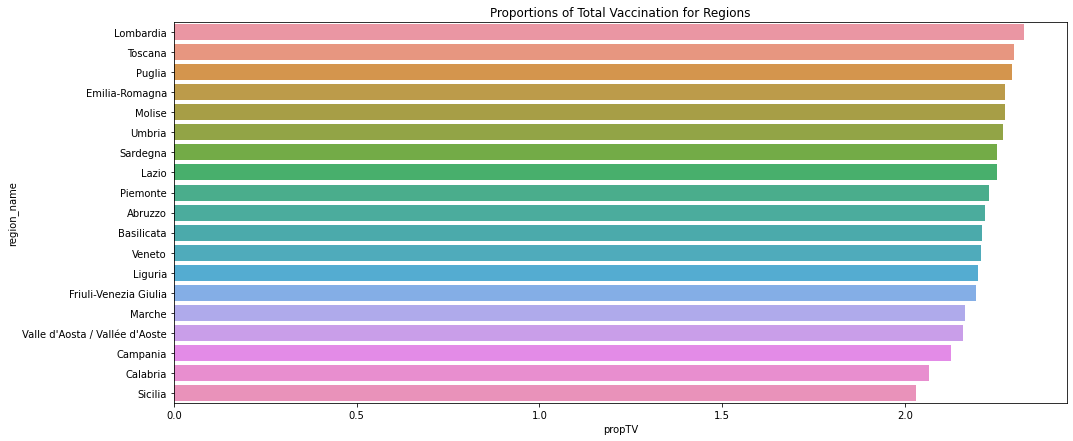

The region with the highest proportion of total vaccinations is: Lombardia


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


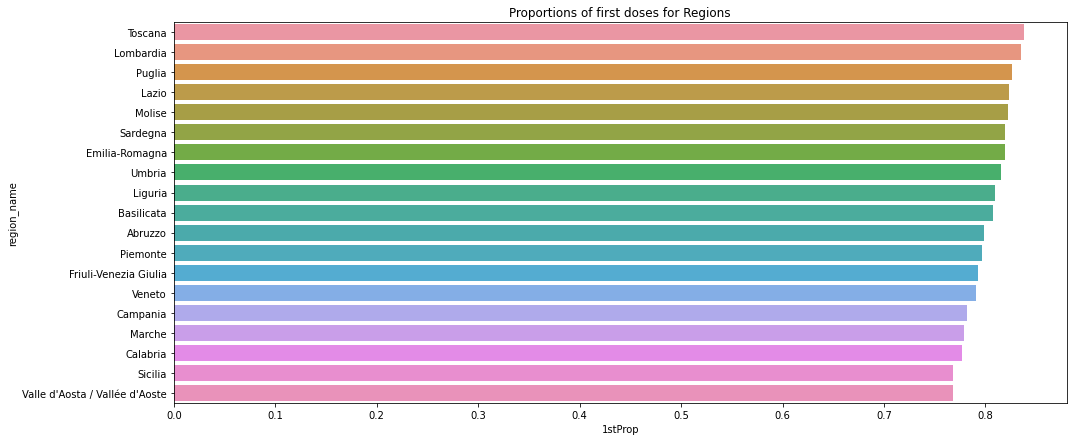

The region with the highest proportion of first doses is: Toscana


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


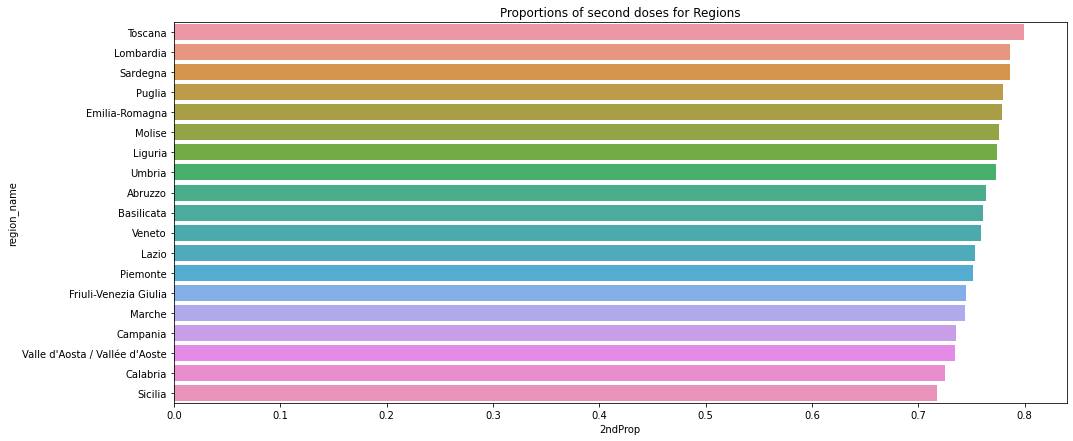

The region with the highest proportion of second doses is: Toscana


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


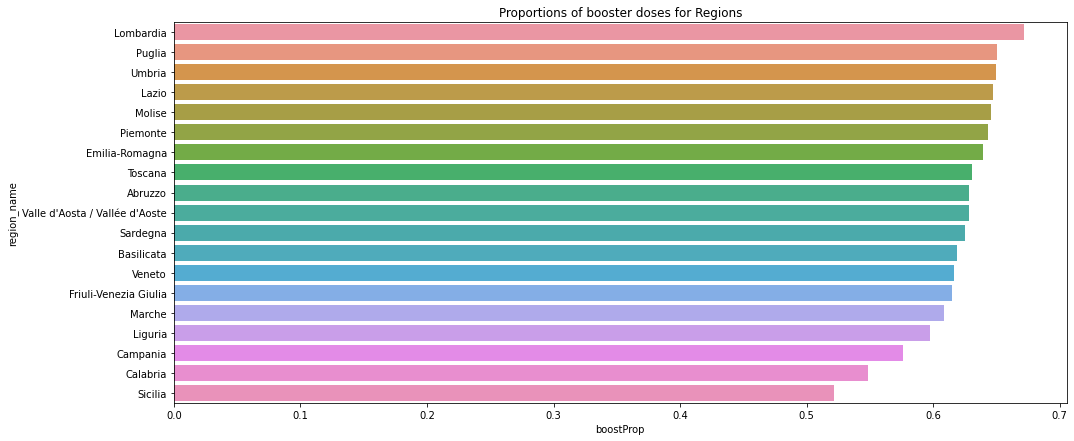

The region with the highest proportion of booster doses is: Lombardia


In [63]:
a=reg_name1.sort_values(by=("propTV"),ascending = False)
plt.figure(figsize=(16,7))
fig=sns.barplot(a["propTV"],a.index)
plt.title("Proportions of Total Vaccination for Regions")
plt.show()
print("The region with the highest proportion of total vaccinations is:", a.index[0]) 

a=reg_name1.sort_values(by=("1stProp"),ascending = False)
plt.figure(figsize=(16,7))
sns.barplot(a["1stProp"],a.index)
plt.title("Proportions of first doses for Regions")
plt.show()
print("The region with the highest proportion of first doses is:",a.index[0])

a=reg_name1.sort_values(by=("2ndProp"),ascending = False)
plt.figure(figsize=(16,7))
sns.barplot(a["2ndProp"],a.index)
plt.title("Proportions of second doses for Regions")
plt.show()
print("The region with the highest proportion of second doses is:", a.index[0])

a=reg_name1.sort_values(by=("boostProp"),ascending = False)
plt.figure(figsize=(16,7))
sns.barplot(a["boostProp"],a.index)
plt.title("Proportions of booster doses for Regions")
plt.show()
print("The region with the highest proportion of booster doses is:",a.index[0])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Booster Vaccinated for Region'}, xlabel='region', ylabel='additional_booster_dose'>

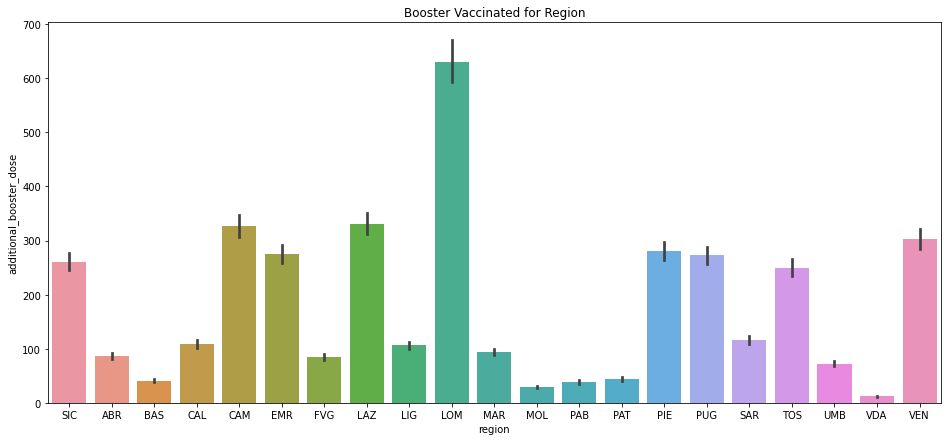

In [64]:
plt.figure(figsize=(16,7))
plt.title("Booster Vaccinated for Region")
sns.barplot(data["region"],data["additional_booster_dose"])

General Trends <a class="anchor" id="8"></a>
===

Data Grouped by day
===
To make an analysis of trends we need to make some grouping operations on the Dataset. 
Here we can group the data by day

In [65]:
data.groupby("administration_date")["first_dose","second_dose","previous infection","additional_booster_dose"].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,first_dose,second_dose,previous infection,additional_booster_dose
administration_date,,,,
2020-12-27,7331,0,17,0
2020-12-28,1503,0,2,0
2020-12-29,1097,0,1,0
2020-12-30,4881,0,3,0
2020-12-31,25907,0,37,0
...,...,...,...,...
2022-02-24,5991,31526,554,77618
2022-02-25,5487,33516,569,89604
2022-02-26,5392,37852,706,88189


We can note that Astrazeneca was the most used in the first period of vaccination while Pfizer was the most diffused during the last year excepting for the last weeks because of the difficult to find other doses of Pfizer.

We can note the presence in the last part of the serie of the new kind of vaccine "Pfizer Pediatrico" who is for young kids. 
Remember that the govern authorized the vaccine for young children just in the last weeks. That's why we find this kind of vaccine just on the right side of the graph.

Due to the recent authorization of vaccines for children we still not have data for the second dose.

This is because of the lack of doses of Pfizer, most people could only have a booster dose of Moderna

Focusing on the last period we can see how it's more common to find booster of moderna Vaccines. 

In [66]:
df = data[['administration_date', 'supplier', 'region', 'age_range', 'males',
       'females', 'first_dose', 'second_dose', 'previous infection',
       'additional_booster_dose', 'region_name', 'date']].copy()
df.head()

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,region_name,date
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,Sicilia,2020-12-27
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,Abruzzo,2020-12-27
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,Abruzzo,2020-12-27
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,Abruzzo,2020-12-27
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,Abruzzo,2020-12-27


In [67]:
df["TotVaccine"]=data["first_dose"]+data["second_dose"]+data["previous infection"]+data["additional_booster_dose"]
df

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous infection,additional_booster_dose,region_name,date,TotVaccine
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,Sicilia,2020-12-27,1
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,Abruzzo,2020-12-27,2
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,Abruzzo,2020-12-27,5
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,Abruzzo,2020-12-27,9
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,Abruzzo,2020-12-27,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192637,2022-02-28,Pfizer/BioNTech,VEN,50-59,210,203,13,74,10,316,Veneto,2022-02-28,413
192638,2022-02-28,Pfizer/BioNTech,VEN,60-69,108,113,5,53,2,161,Veneto,2022-02-28,221
192639,2022-02-28,Pfizer/BioNTech,VEN,70-79,55,60,4,29,1,81,Veneto,2022-02-28,115
192640,2022-02-28,Pfizer/BioNTech,VEN,80-89,10,31,1,17,0,23,Veneto,2022-02-28,41


Let's see how the situation of the total of daily vaccines has evolved during the time

The campaign begun in january of 2021. We have 2 peakse. The first one is after the introduction of the green pass in July.In this phase the most of the people vaccineted was old people and the part of population who accepted withouth particularly problems this decision. The second peak is in january with the introduction of vaccines for young children simoultaneosly with the new introduction of reinforced green pass. With this law many people who were not vaccinated choose to have the first dose who allowed them to work. In this phase we have a wider distribution of people vaccinated including the ones who were skeptic at the beginning and young people as well.

The goal of the italian government was to get the 80% of the total of population vaccinated or atleast the 90% for the old people and citizen with high risk. We can say that this goal has been achieved despite a slow start and the next step is to increase this percentage for the total population included young people.
We will see in the next months.

https://www.reuters.com/article/us-health-coronavirus-italy-vaccines-idUSKBN2B50L0

In [68]:
"""
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="TotVaccine",data=df).set_xticklabels(["2020-12-27","2021-03-17","2021-07-01","2021-08-06","2021-12-06"])
plt.title("Previous infection")
plt.show()
"""

'\nplt.figure(figsize=(20,7))\nsns.lineplot(x="date",y="TotVaccine",data=df).set_xticklabels(["2020-12-27","2021-03-17","2021-07-01","2021-08-06","2021-12-06"])\nplt.title("Previous infection")\nplt.show()\n'

Now let's try to aggregate the vaccines in daily somministrations
---

We will create a new dataframe with data grouped for daily  total of vaccinations and we will call it "daily".

In [69]:
daily=pd.DataFrame(df.groupby("date")["TotVaccine"].sum())
daily["day"]=df.date.unique()
daily

,TotVaccine,day
date,,
2020-12-27,7348,2020-12-27
2020-12-28,1505,2020-12-28
2020-12-29,1098,2020-12-29
2020-12-30,4884,2020-12-30
2020-12-31,25944,2020-12-31
...,...,...
2022-02-24,115689,2022-02-24
2022-02-25,129176,2022-02-25
2022-02-26,132139,2022-02-26


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


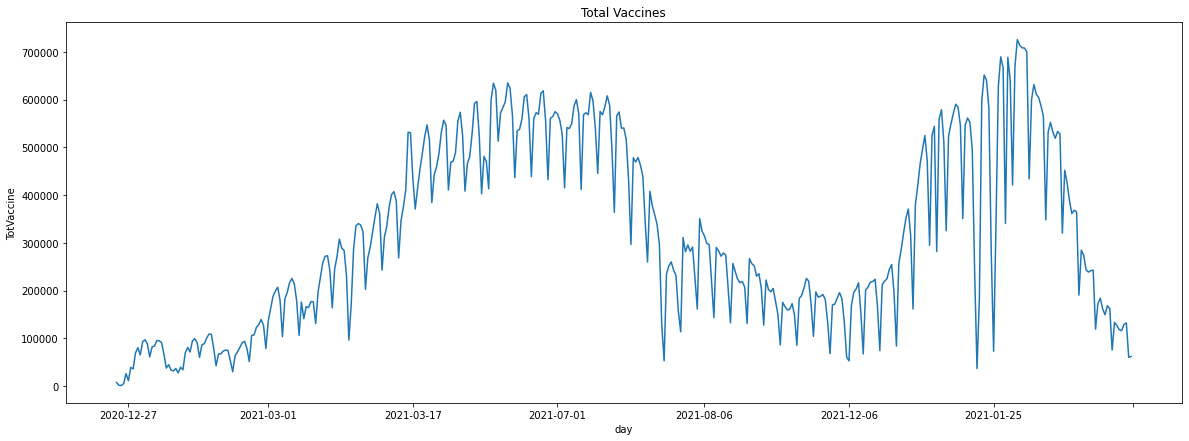

In [70]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="TotVaccine",data=daily).set_xticklabels(["2020-12-27","2021-03-01","2021-03-17","2021-07-01","2021-08-06","2021-12-06","2021-01-25"])
plt.title("Total Vaccines")
plt.show()

In the last Graph i decided to highlight some specific Dates

What they represent?

The vaccination compaign has begun with the first vaccine on december 2021. Than after a low increase the govern appointed on march 2021 the Paolo Figliuolo as special commissioner for the campagin with the task to organize the distribution of the vaccines.

On March 21th 2021 The European Union has decided to block the somministration of Axtrazeneca and we can note the effet of this decision with the first slowdown on the campaign due to the panic following the release of news related to the side effects of the astrazeneca vaccine in part of the populations.

After the slowdown people resumed this time with other kind of vaccines (especially Pfizer and Moderna) till the summer.
Once the vaccination of people easily convinced (high age groups and people high risk people) by the vaccine was almost finished the govern decided to introduce the  Green Pass to convince the remaining part of population (young age groups and skeptical people).

The first version was discussed in June-July 2021 and became effective on August 6th 2021. We can observe that the number of daily vaccinations was generally stable beginning a decrease at the end of summer due to the fact that most of the population was now vaccinated.

So we can note the last significative data December 6th 2021 who is the day of the introduction of the "Super Green Pass" a new measure that require other restrictive parameters. 

In the first version of Green pass people skeptical could still parteticiate to the social live going to work or attending meeting places even not vaccinated just with an antigenic or molecolar negative swab. 

With the Super Green pass this is no more possible.

At the same time a new wave of infections and the introduction of the Booster dose influenced the new resumptions in the number of daily vaccinations.


In [71]:
daily=pd.DataFrame(df.groupby("date")[["TotVaccine","first_dose","second_dose","previous infection","additional_booster_dose","males","females"]].sum())
daily["day"]=df.date.unique()
daily

,TotVaccine,first_dose,second_dose,previous infection,additional_booster_dose,males,females,day
date,,,,,,,,
2020-12-27,7348,7331,0,17,0,3499,3849,2020-12-27
2020-12-28,1505,1503,0,2,0,689,816,2020-12-28
2020-12-29,1098,1097,0,1,0,486,612,2020-12-29
2020-12-30,4884,4881,0,3,0,1965,2919,2020-12-30
2020-12-31,25944,25907,0,37,0,10064,15880,2020-12-31
...,...,...,...,...,...,...,...,...
2022-02-24,115689,5991,31526,554,77618,58091,57598,2022-02-24
2022-02-25,129176,5487,33516,569,89604,64311,64865,2022-02-25
2022-02-26,132139,5392,37852,706,88189,67160,64979,2022-02-26


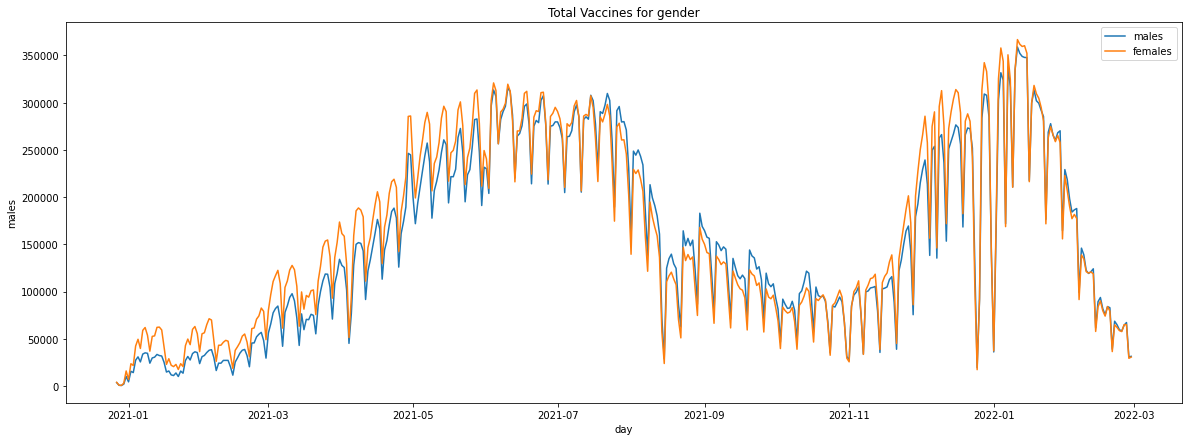

In [72]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="males",data=daily,label="males")
sns.lineplot(x="day",y="females",data=daily,label="females")
plt.title("Total Vaccines for gender")
plt.show()

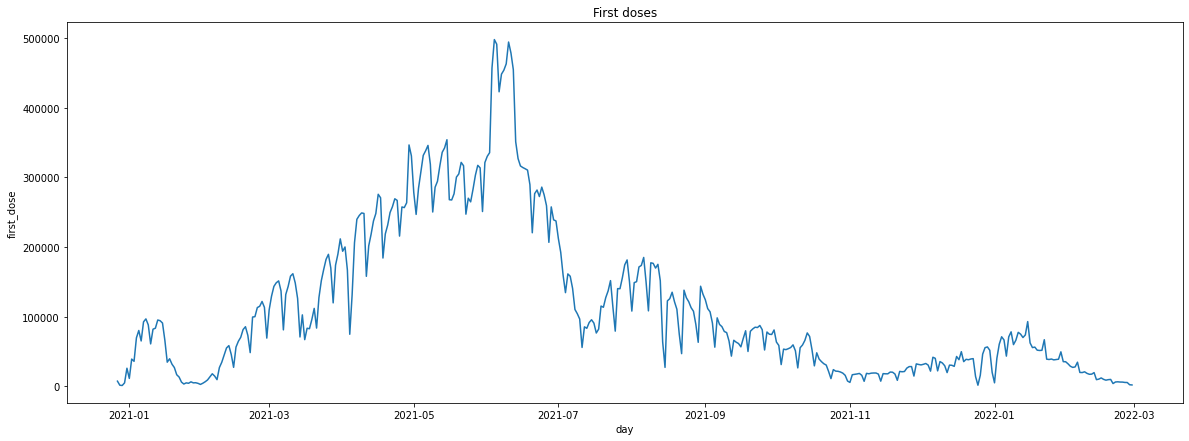

In [73]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="first_dose",data=daily)
plt.title("First doses")
plt.show()

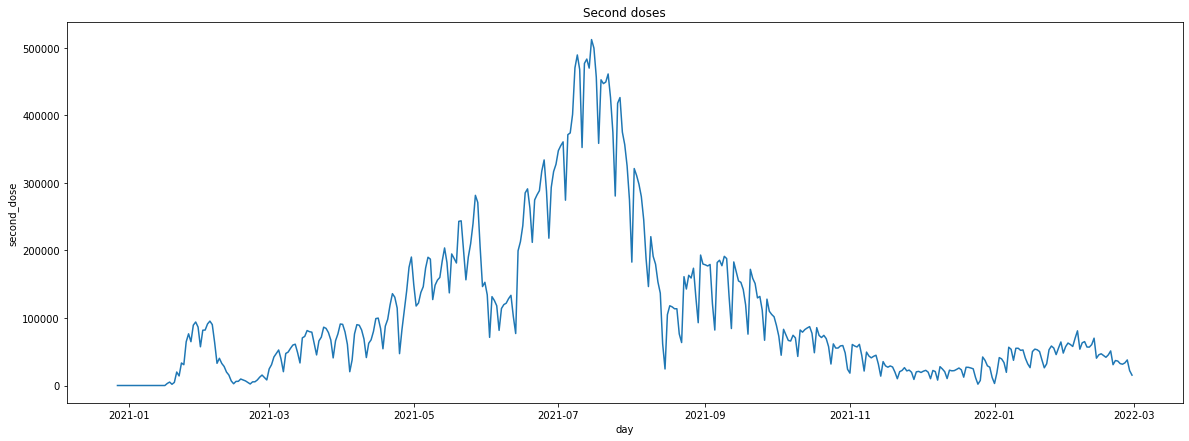

In [74]:
plt.figure(figsize=(20,7))
#sns.lineplot(x="day",y="second_dose",data=daily).set_xticklabels(["2020-12-27","2021-03-01","2021-03-17","2021-07-01","2021-08-06","2021-12-06"])
sns.lineplot(x="day",y="second_dose",data=daily)
plt.title("Second doses")
plt.show()

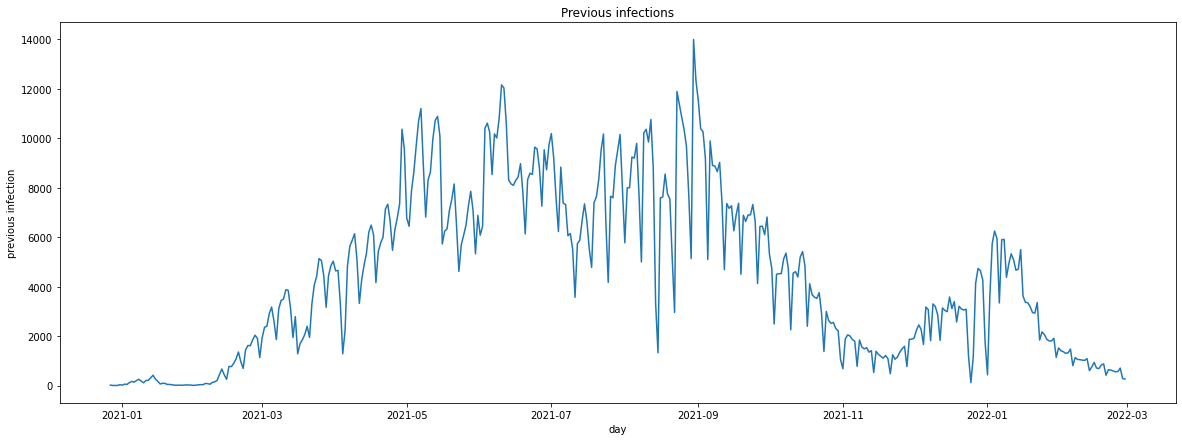

In [75]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="previous infection",data=daily)
plt.title("Previous infections")
plt.show()

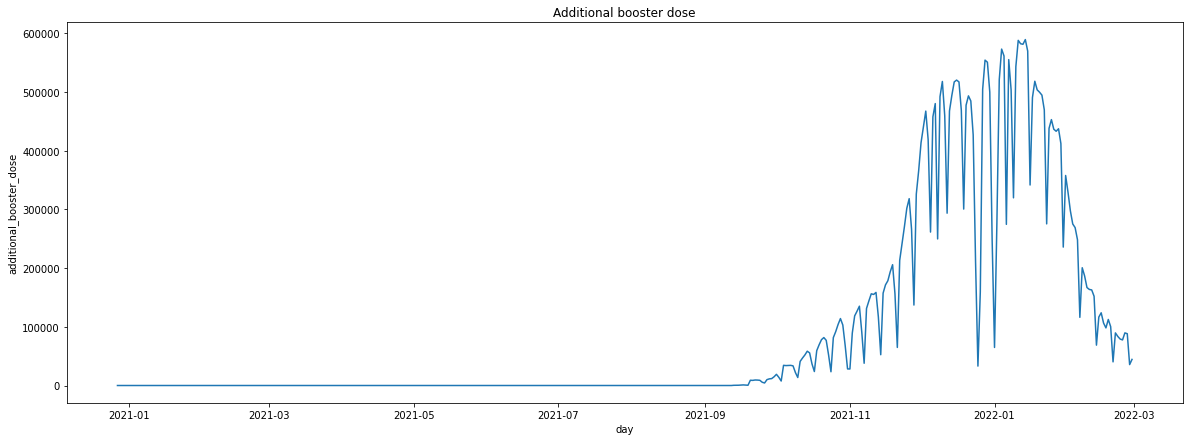

In [76]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="additional_booster_dose",data=daily)
plt.title("Additional booster dose")
plt.show()

In [77]:
pfizer=data[data["supplier"]=="Pfizer/BioNTech"]
pfizer=pd.DataFrame(pfizer.groupby("date")["dailytotal"].sum())
pfizer["day"]=df.date.unique()
pfizer

,dailytotal,day
date,,
2020-12-27,7347,2020-12-27
2020-12-28,1501,2020-12-28
2020-12-29,1094,2020-12-29
2020-12-30,4873,2020-12-30
2020-12-31,25944,2020-12-31
...,...,...
2022-02-24,62440,2022-02-24
2022-02-25,71912,2022-02-25
2022-02-26,67358,2022-02-26


Text(0.5, 1.0, 'Pfizer vaccinations')

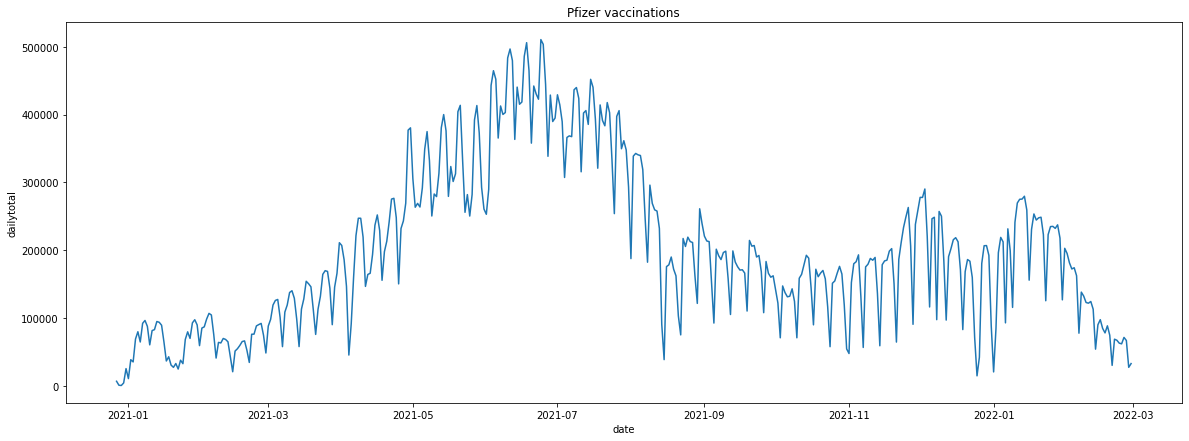

In [78]:
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=pfizer)
plt.title ("Pfizer vaccinations")

Text(0.5, 1.0, 'Moderna vaccinations')

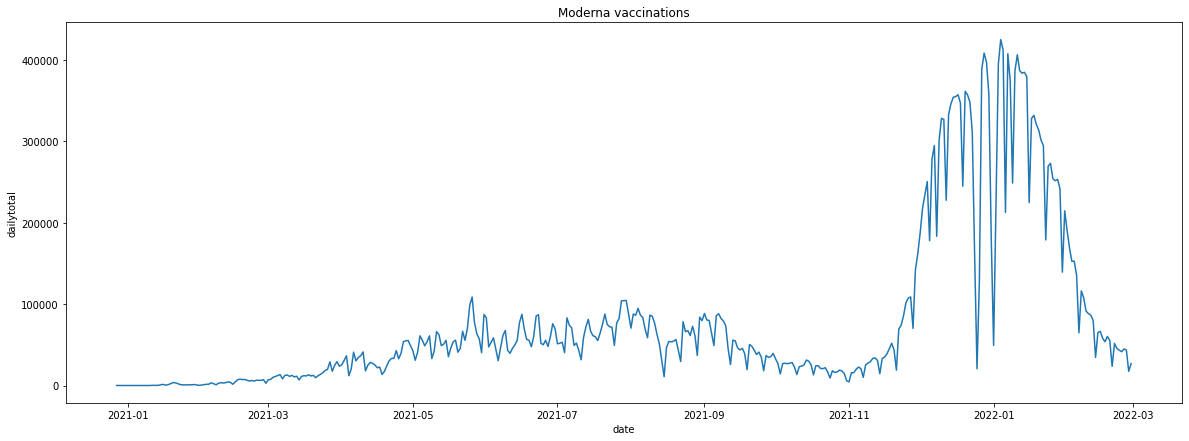

In [79]:
moderna=data[data["supplier"]=="Moderna"]
moderna=pd.DataFrame(moderna.groupby("date")["dailytotal"].sum())
#moderna["day"]=df.date.unique()

plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=moderna)
plt.title ("Moderna vaccinations")


in moderna devo inserire un valore mancante per il 31-12-2020 ossia indice di riga 4
https://stackoverflow.com/questions/15888648/is-it-possible-to-insert-a-row-at-an-arbitrary-position-in-a-dataframe-using-pan


Text(0.5, 1.0, 'Janssen vaccinations')

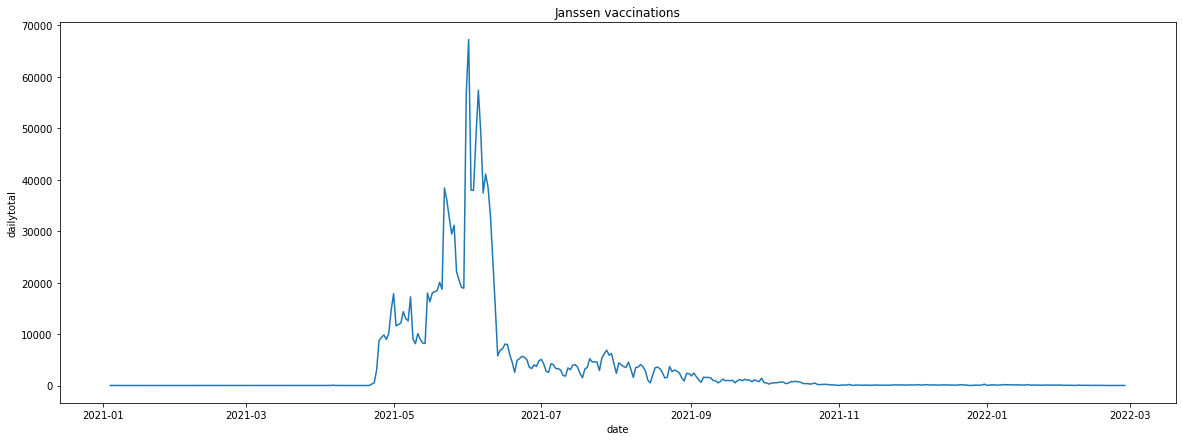

In [80]:
data.supplier.unique()
janssen=data[data["supplier"]=="Janssen"]
janssen=pd.DataFrame(janssen.groupby("date")["dailytotal"].sum())
janssen

plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=janssen)
plt.title ("Janssen vaccinations")

Text(0.5, 1.0, 'Astrazeneca vaccinations')

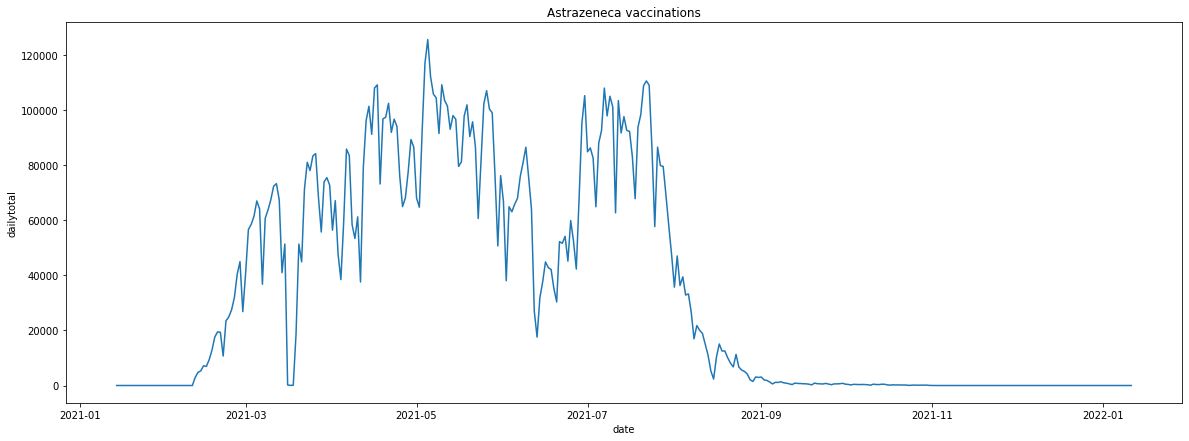

In [81]:
data.supplier.unique()
astra=data[data["supplier"]=="Vaxzevria (AstraZeneca)"]
astra=pd.DataFrame(astra.groupby("date")["dailytotal"].sum())
astra
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=astra)
plt.title ("Astrazeneca vaccinations")


Text(0.5, 1.0, "Pfizer for children's vaccinations")

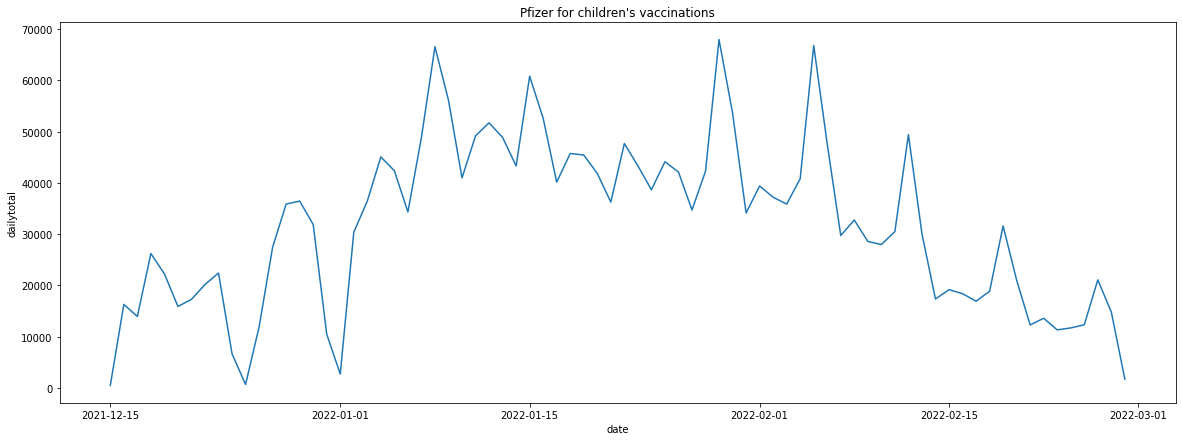

In [82]:
pfizch=data[data["supplier"]=="Pfizer for children"]
pfizch=pd.DataFrame(pfizch.groupby("date")["dailytotal"].sum())
pfizch
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=pfizch)
plt.title ("Pfizer for children's vaccinations")

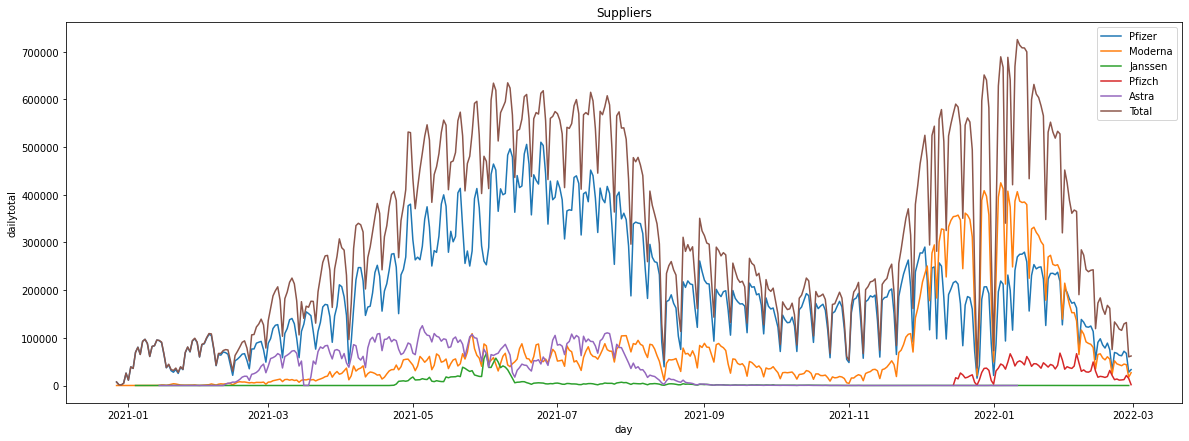

In [83]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="dailytotal",data=pfizer,label= "Pfizer").get_figure()
sns.lineplot(x="date",y="dailytotal",data=moderna,label="Moderna")
sns.lineplot(x="date",y="dailytotal",data=janssen,label = "Janssen")
sns.lineplot(x="date",y="dailytotal",data=pfizch,label ="Pfizch")
sns.lineplot(x="date",y="dailytotal",data=astra,label="Astra")
sns.lineplot(x="date",y="TotVaccine",data=daily,label="Total")
plt.title("Suppliers")
plt.savefig('save_as_a_png.png')
plt.show()

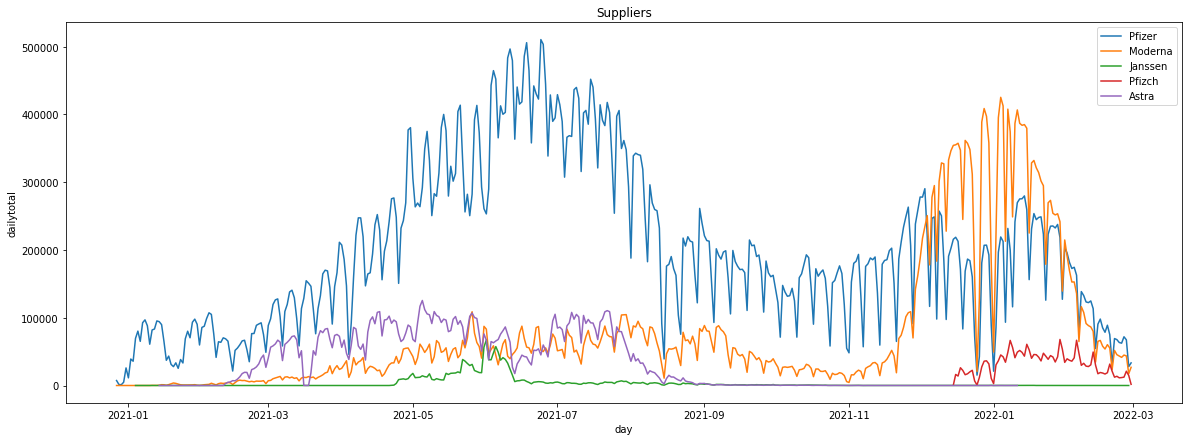

In [84]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="dailytotal",data=pfizer,label= "Pfizer").get_figure()
sns.lineplot(x="date",y="dailytotal",data=moderna,label="Moderna")
sns.lineplot(x="date",y="dailytotal",data=janssen,label = "Janssen")
sns.lineplot(x="date",y="dailytotal",data=pfizch,label ="Pfizch")
sns.lineplot(x="date",y="dailytotal",data=astra,label="Astra")
plt.title("Suppliers")
plt.savefig('save_as_a_png.png')
plt.show()

In [85]:
Vaccination=pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
Vaccination

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79481,Zimbabwe,ZWE,2022-02-20,7823894.0,4340412.0,3372616.0,3009.0,9447.0,51.84,28.76,22.35,626.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
79482,Zimbabwe,ZWE,2022-02-21,7829096.0,4342121.0,3374371.0,5202.0,9258.0,51.88,28.77,22.36,613.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
79483,Zimbabwe,ZWE,2022-02-22,7836325.0,4344922.0,3376712.0,7229.0,9329.0,51.92,28.79,22.37,618.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
79484,Zimbabwe,ZWE,2022-02-23,7847314.0,4347992.0,3381246.0,10989.0,9193.0,52.00,28.81,22.40,609.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


We found as well another Dataset who can be used for confirmation to extend our research 

In [86]:
Italy=Vaccination[Vaccination.country=="Italy"]
Italy.tail(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
35697,Italy,ITA,2022-02-22,133475845.0,50598357.0,47302047.0,126593.0,139386.0,221.11,83.82,78.36,2309.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Extraordinary commissioner for the Covid-19 em...,https://raw.githubusercontent.com/italia/covid...
35698,Italy,ITA,2022-02-23,133593607.0,50604992.0,47334395.0,117762.0,133158.0,221.30,83.83,78.41,2206.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Extraordinary commissioner for the Covid-19 em...,https://raw.githubusercontent.com/italia/covid...
35699,Italy,ITA,2022-02-24,133707059.0,50611389.0,47366045.0,113452.0,128044.0,221.49,83.84,78.46,2121.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Extraordinary commissioner for the Covid-19 em...,https://raw.githubusercontent.com/italia/covid...


In [87]:
Vaccination.isnull().mean()

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.486639
people_vaccinated                      0.513575
people_fully_vaccinated                0.544448
daily_vaccinations_raw                 0.582153
daily_vaccinations                     0.003938
total_vaccinations_per_hundred         0.486639
people_vaccinated_per_hundred          0.513575
people_fully_vaccinated_per_hundred    0.544448
daily_vaccinations_per_million         0.003938
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [106]:
Vaccination.groupby("country")["people_vaccinated"].max()

country
Afghanistan           4801524.0
Albania               1265923.0
Algeria               7403900.0
Andorra                 57791.0
Angola               10427400.0
                        ...    
Wales                 2519201.0
Wallis and Futuna        6151.0
Yemen                  614653.0
Zambia                 806611.0
Zimbabwe              4351621.0
Name: people_vaccinated, Length: 223, dtype: float64

In [109]:
Vaccination.pivot_table(values="people_fully_vaccinated",index=["country"],aggfunc="max")

,people_fully_vaccinated
country,
Afghanistan,4125717.0
Albania,1188503.0
Algeria,6003539.0
Andorra,53208.0
Angola,5278086.0
...,...
Wales,2383405.0
Wallis and Futuna,6136.0
Yemen,372918.0


In [114]:
Vaccination[["country","people_vaccinated"]].groupby("country").max()

,people_vaccinated
country,
Afghanistan,4801524.0
Albania,1265923.0
Algeria,7403900.0
Andorra,57791.0
Angola,10427400.0
...,...
Wales,2519201.0
Wallis and Futuna,6151.0
Yemen,614653.0


In [115]:
Vaccination[["country","total_vaccinations"]].groupby("country").max()

,total_vaccinations
country,
Afghanistan,5412309.0
Albania,2683715.0
Algeria,13461201.0
Andorra,141962.0
Angola,15902065.0
...,...
Wales,6859296.0
Wallis and Futuna,12287.0
Yemen,772574.0


In [116]:
Vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79486 entries, 0 to 79485
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              79486 non-null  object 
 1   iso_code                             79486 non-null  object 
 2   date                                 79486 non-null  object 
 3   total_vaccinations                   40805 non-null  float64
 4   people_vaccinated                    38664 non-null  float64
 5   people_fully_vaccinated              36210 non-null  float64
 6   daily_vaccinations_raw               33213 non-null  float64
 7   daily_vaccinations                   79173 non-null  float64
 8   total_vaccinations_per_hundred       40805 non-null  float64
 9   people_vaccinated_per_hundred        38664 non-null  float64
 10  people_fully_vaccinated_per_hundred  36210 non-null  float64
 11  daily_vaccinations_per_milli

In [122]:
Vaccination[["country","total_vaccinations_per_hundred"]].groupby("country").mean().sort_values("total_vaccinations_per_hundred")

,total_vaccinations_per_hundred
country,
Burundi,0.026400
Democratic Republic of Congo,0.189216
Haiti,0.629231
Chad,0.921053
South Sudan,1.069545
...,...
United Arab Emirates,146.132039
Pitcairn,148.086000
Jersey,150.985542
